# 수익성 분석

## 데이터 불러오기, 전처리, EDA

### 데이터
- 역별 데이터
- 일평균승하차 : 역별 일평균승하차
- 업장수 : 10인 이하 업체
- 1인 가구수, 2인 가구수
- 환승 : 환승역 1
- 면적(m**2)
- 레벨 데이터 : 1부터 10까지 레벨
- 일평균(원) : 역별 일평균 운수 수익

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

In [3]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [110]:
df = pd.read_csv('./가통합데이터_추가수정(거자수X1인가구).csv', encoding='euc-kr')
df.head(2)

,역사명,역위도,역경도,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수 레벨,1인 가구수(세대),사업체수,거주X1인,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,일평균(원)
0,가야역,35.155883,129.042817,5799,11.0,25217,0.95,83,6291,49,158640147,57,NaN,1.0,NaN,0,0,1926082
1,감전역,35.155528,128.991146,6107,10.0,12825,1.12,56,5461,57,70037325,31,NaN,NaN,NaN,0,0,2535118


In [111]:
df.isnull().sum()

역사명                0
역위도                0
역경도                0
일평균승하차(명)          0
상가 면적              9
거주자수               0
남여비율               0
1인 가구수 레벨          0
1인 가구수(세대)         0
사업체수               0
거주X1인              0
20~40대 인구 수 레벨     0
고속버스 터미널          98
기차역               90
여객 터미널            99
주변 관광지             0
주변 대학교             0
일평균(원)             0
dtype: int64

In [112]:
df = df.fillna(0)
df.isnull().sum()

역사명               0
역위도               0
역경도               0
일평균승하차(명)         0
상가 면적             0
거주자수              0
남여비율              0
1인 가구수 레벨         0
1인 가구수(세대)        0
사업체수              0
거주X1인             0
20~40대 인구 수 레벨    0
고속버스 터미널          0
기차역               0
여객 터미널            0
주변 관광지            0
주변 대학교            0
일평균(원)            0
dtype: int64

In [113]:
df_dr = df.drop(["역사명","역위도","역경도","거주자수","1인 가구수(세대)","1인 가구수 레벨","20~40대 인구 수 레벨","고속버스 터미널","기차역","여객 터미널","주변 관광지","주변 대학교"], axis=1)
df_dr.head()

,일평균승하차(명),상가 면적,남여비율,사업체수,거주X1인,일평균(원)
0,5799,11.0,0.95,49,158640147,1926082
1,6107,10.0,1.12,57,70037325,2535118
2,4251,0.0,1.22,109,9611880,2029127
3,13621,37.0,0.94,36,67994687,4717075
4,9546,16.0,0.91,114,84757479,3099526


### 산점도

In [49]:
"""sns.set(font_scale=1.1) ## 폰트사이즈 조절
sns.set_style('ticks') ## 축 눈금 표시
data = df_dr
sns.pairplot(data,
             diag_kind=None)
plt.show()"""

"sns.set(font_scale=1.1) ## 폰트사이즈 조절\nsns.set_style('ticks') ## 축 눈금 표시\ndata = df_dr\nsns.pairplot(data,\n             diag_kind=None)\nplt.show()"

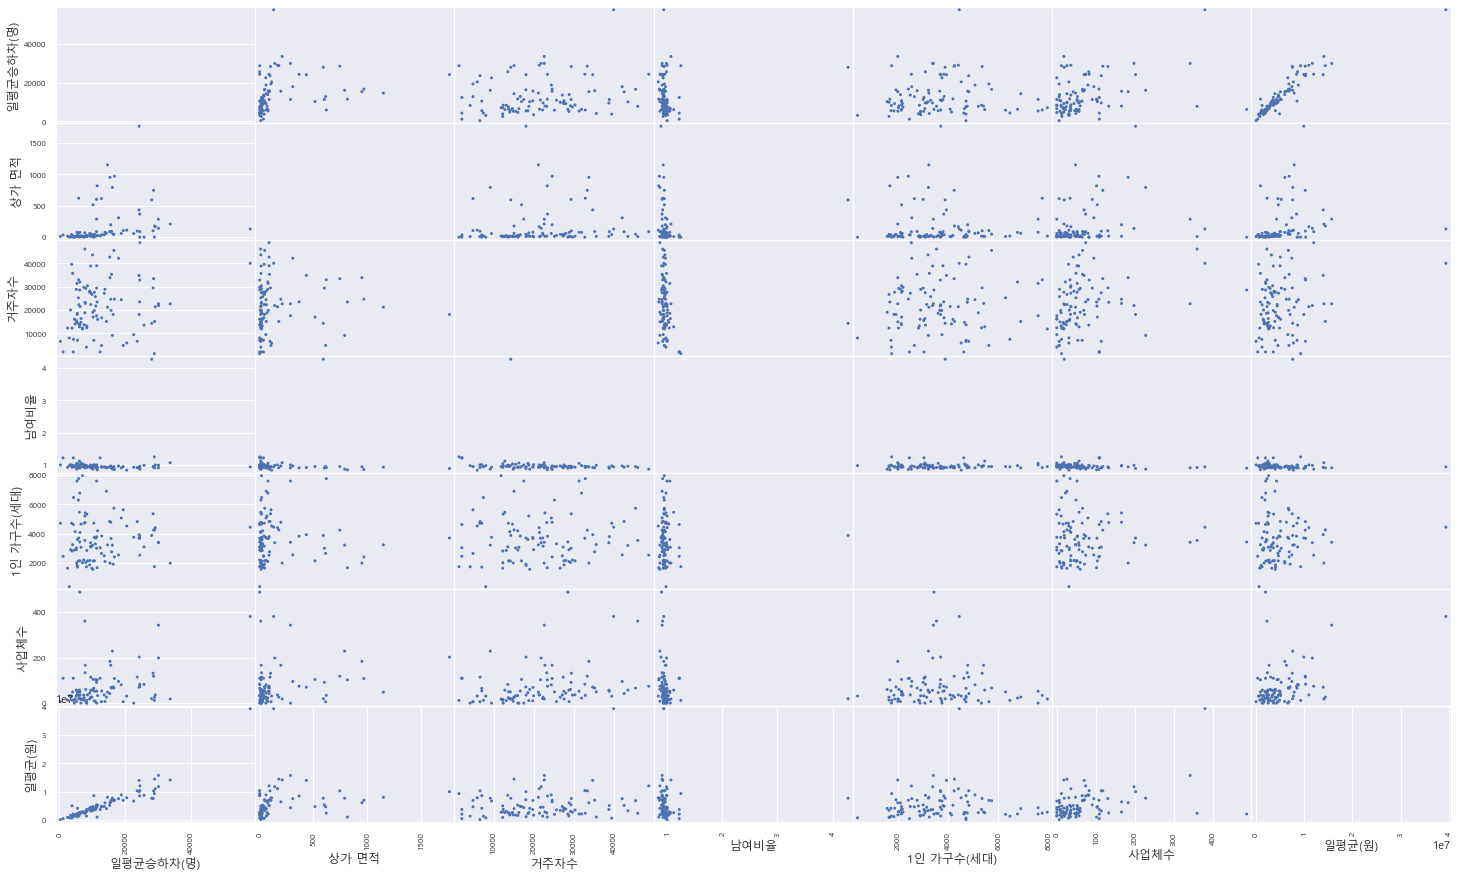

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_dr,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

#### 일평균 운행수익과 각 변수별 산점도

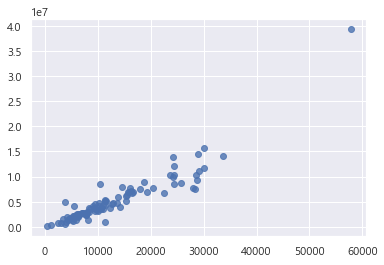

In [9]:
# 일평균 승하차와 일평균 수익 산점도
plt.scatter(df_dr[['일평균승하차(명)']], df_dr[['일평균(원)']], alpha=0.8)
plt.show()

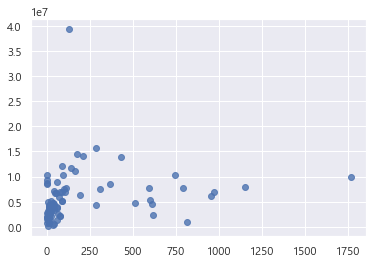

In [10]:
# 업장수와 일평균 수익 산점도
plt.scatter(df_dr[['상가 면적']], df_dr[['일평균(원)']], alpha=0.8)
plt.show()

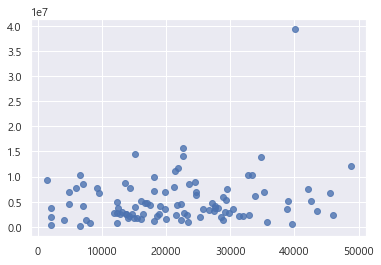

In [11]:
# 1인 가구수와 일평균 수익 산점도
plt.scatter(df_dr[['거주자수']], df_dr[['일평균(원)']], alpha=0.8)
plt.show()

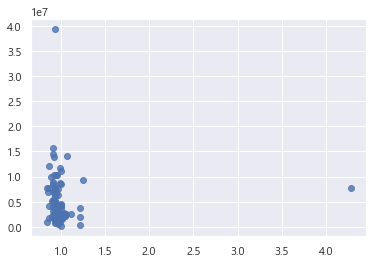

In [12]:
# 총 상가 수와 일평균 수익 산점도
plt.scatter(df_dr[['남여비율']], df_dr[['일평균(원)']], alpha=0.8)
plt.show()

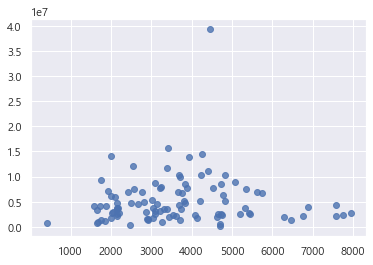

In [13]:
# 전체 상가 면적와 일평균 수익 산점도
plt.scatter(df_dr[['1인 가구수(세대)']], df_dr[['일평균(원)']], alpha=0.8)
plt.show()

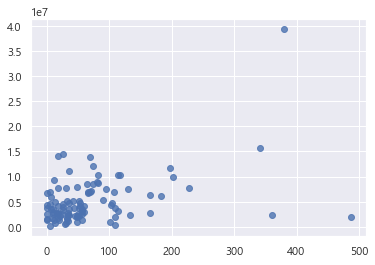

In [14]:
# 전체 상가 면적와 일평균 수익 산점도
plt.scatter(df_dr[['사업체수']], df_dr[['일평균(원)']], alpha=0.8)
plt.show()

일평균 승하차를 제외한 변수는 선형성이 보이지 않음

## 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [15]:
df_dr_corr = df_dr.corr()
df_dr_corr

,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수(세대),사업체수,일평균(원)
일평균승하차(명),1.000000,0.300601,0.177225,0.135357,0.033473,0.355560,0.919696
상가 면적,0.300601,1.000000,0.071730,0.088919,-0.032205,0.234948,0.238792
거주자수,0.177225,0.071730,1.000000,-0.142207,0.041797,0.278248,0.199948
남여비율,0.135357,0.088919,-0.142207,1.000000,0.017280,-0.091802,0.019308
1인 가구수(세대),0.033473,-0.032205,0.041797,0.017280,1.000000,-0.011647,0.036853
사업체수,0.355560,0.234948,0.278248,-0.091802,-0.011647,1.000000,0.420679
일평균(원),0.919696,0.238792,0.199948,0.019308,0.036853,0.420679,1.000000


### 히트맵 확인

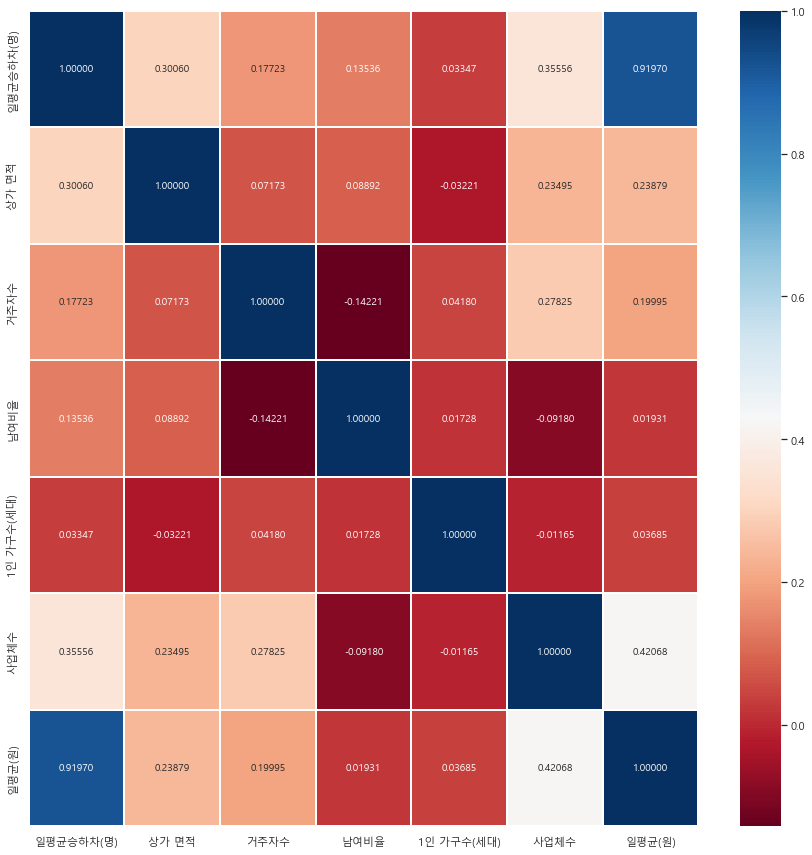

In [16]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

## 다중회귀분석

In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [19]:
x = df_dr[["일평균승하차(명)","상가 면적","거주자수","남여비율","1인 가구수(세대)","사업체수"]]

In [20]:
y = df_dr[["일평균(원)"]]

In [21]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [22]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [23]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              171.3
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                    1.88e-37
Time:                        20:01:48   Log-Likelihood:                         -1109.7
No. Observations:                  70   AIC:                                      2231.
Df Residuals:                      64   BIC:                                      2245.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.938
- Adj. R-squared : 0.933
- P>[t] : 일평균승하차(명), 남여비율 외에는 유의미하지 않음

In [24]:
x = df_dr[["일평균승하차(명)", "남여비율"]]

In [25]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [26]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [27]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              504.7
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                    1.60e-41
Time:                        10:46:04   Log-Likelihood:                         -1112.3
No. Observations:                  70   AIC:                                      2229.
Df Residuals:                      68   BIC:                                      2233.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- Adj. R-squared : 0.937
- p-value : 일평균승하차(명), 남여비율 : 0.000 (O)

### 선형 회귀

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [26]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8841504646673674

In [27]:
multi_model.score(x_test, y_test)

0.7048394421819713

### 예측

In [28]:
my_predict = mlr.predict(x_test)
my_predict

array([[ 1279742.1771712 ],
       [ 7018340.09685326],
       [ 1517940.9323693 ],
       [ 2242999.10068614],
       [  239844.66601869],
       [ 4454824.4772309 ],
       [ 3319199.06854478],
       [11106176.9441676 ],
       [ 1054134.90418137],
       [ 1704039.65129027],
       [ 2881585.37613375],
       [ 3839640.43129901],
       [ 1505800.75865703],
       [13432644.51727511],
       [ 4629831.36076147],
       [ 4002813.25220469],
       [ 3983157.28331447],
       [ 8848563.54368674],
       [ 1254690.49325031],
       [ 1657116.56228472],
       [11667449.28485026],
       [ 1759858.34209859],
       [ 4037173.64372538],
       [ 6716847.29385314],
       [13064747.17042507],
       [ 4721529.03849075],
       [ 4088685.8821942 ],
       [ 5537726.79696326],
       [ 1814719.24406975],
       [ 3380005.50884603]])

### 시각화

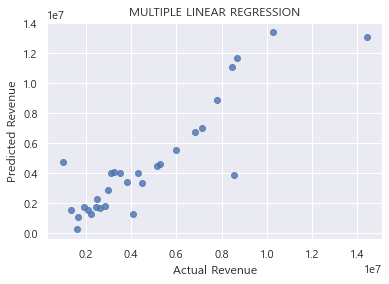

In [29]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 상관계수 확인

In [30]:
print(mlr.coef_)

[[ 5.03450063e+02 -2.64541459e+02  1.24730107e+01 -1.45338877e+06
   7.80822475e+00  5.43443190e+03]]


## 표준화(Standard) 후 재분석

### 표준화

In [124]:
# Numpy 를 이용한 표준화 : z = (x - mean())/std()
df_dr_standard = (df_dr - np.mean(df_dr, axis=0)) / np.std(df_dr, axis=0)
df_dr_standard

,일평균승하차(명),상가 면적,남여비율,사업체수,거주X1인,일평균(원)
0,-0.765385,-0.487547,-0.136504,-0.241846,1.456596,-0.668974
1,-0.731520,-0.490985,0.366874,-0.144670,-0.160095,-0.543833
2,-0.935587,-0.525371,0.662978,0.486972,-1.262648,-0.647801
3,0.094641,-0.398146,-0.166115,-0.399757,-0.197366,-0.095497
4,-0.353403,-0.470354,-0.254946,0.547707,0.108496,-0.427862
...,...,...,...,...,...,...
95,-0.809475,-0.490985,-0.166115,-0.411904,-0.825568,-0.835193
96,0.119380,-0.267482,-0.166115,-0.752019,-0.326071,0.168569
97,1.794353,0.045423,0.011548,-0.399757,0.286090,1.197545
98,0.663411,-0.322498,-0.254946,0.134710,0.823933,0.749317


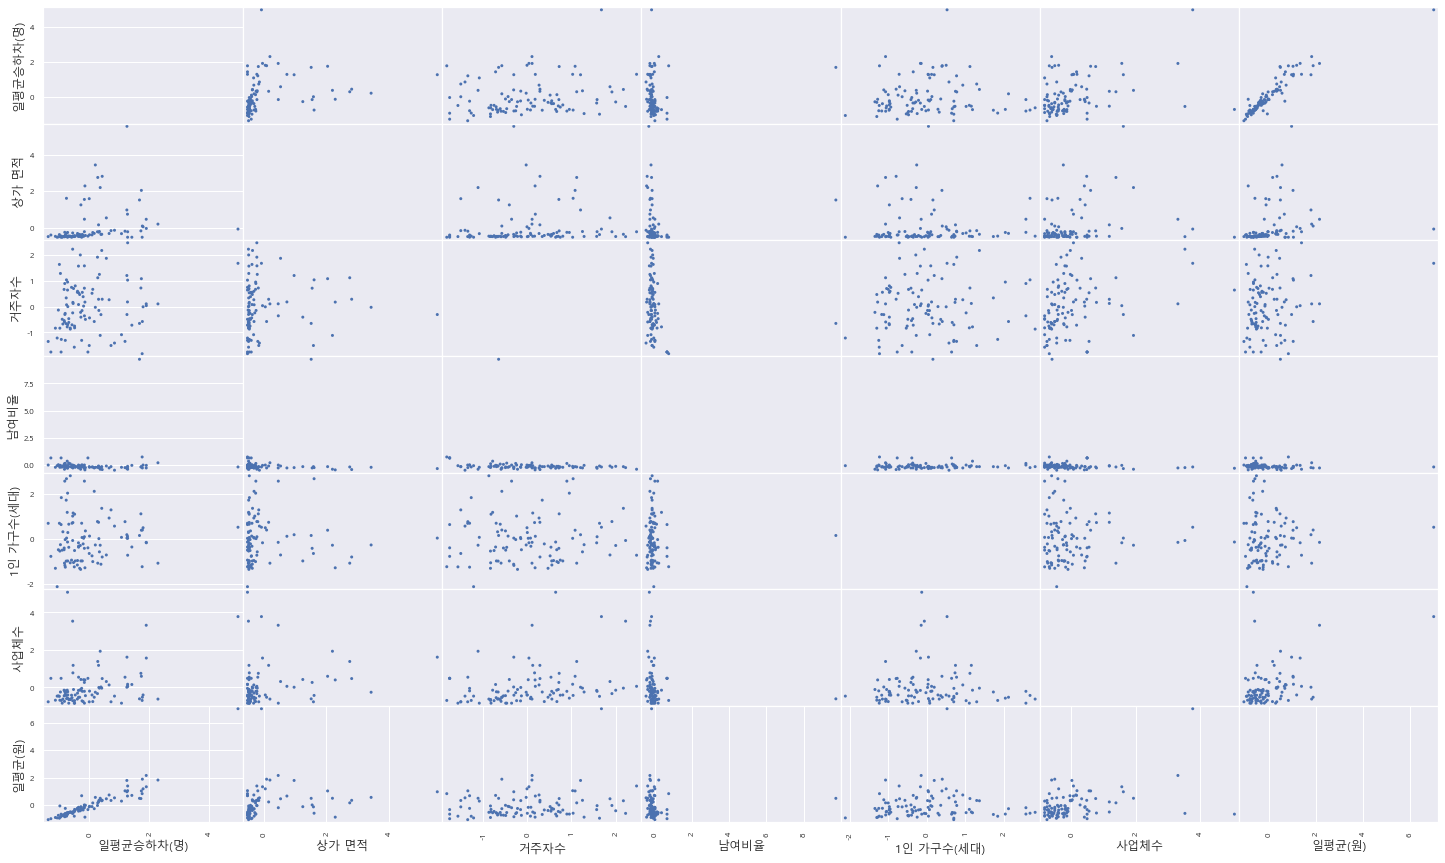

In [32]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df_dr_standard,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

표준화 전/후 같은 산점도가 나옴

### 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [38]:
df_standard_corr = df_dr_standard.corr()
df_standard_corr

,일평균승하차(명),상가 면적(m²),거주자수(명),남여비율,1인 가구수(세대),일평균(원)
일평균승하차(명),1.000000,0.300601,0.177225,0.135357,0.033473,0.919696
상가 면적(m²),0.300601,1.000000,0.071730,0.088919,-0.032205,0.238792
거주자수(명),0.177225,0.071730,1.000000,-0.142207,0.041797,0.199948
남여비율,0.135357,0.088919,-0.142207,1.000000,0.017280,0.019308
1인 가구수(세대),0.033473,-0.032205,0.041797,0.017280,1.000000,0.036853
일평균(원),0.919696,0.238792,0.199948,0.019308,0.036853,1.000000


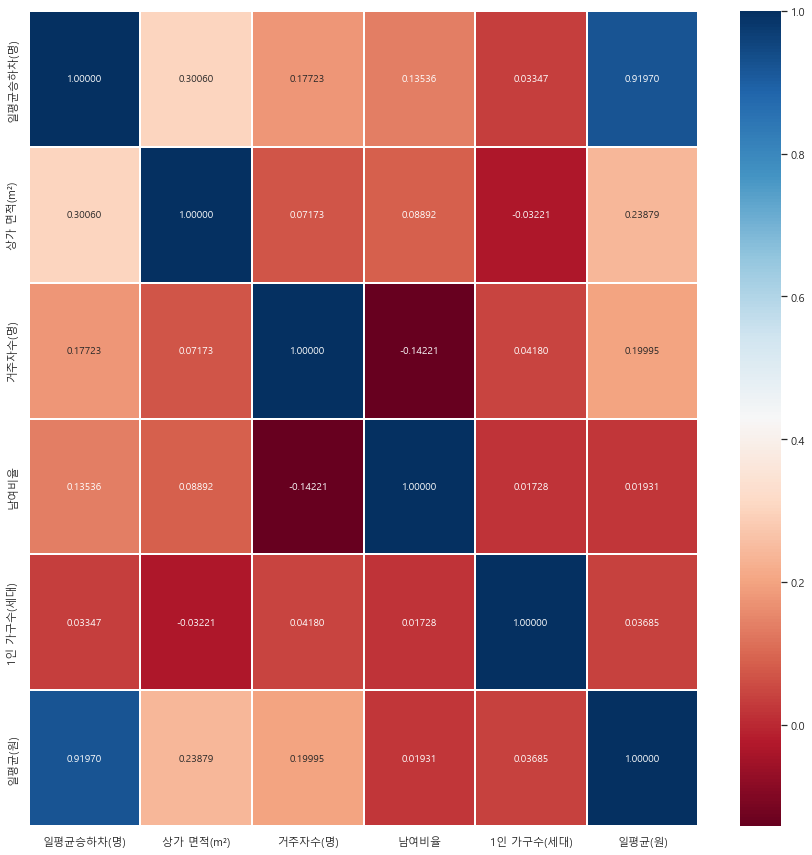

In [39]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_standard_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

표준화 전/후 동일한 상관계수

### 다중회귀분석

#### 회귀모델 적합도

In [125]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [126]:
standard_x = df_dr_standard[["일평균승하차(명)","상가 면적","거주X1인","남여비율","사업체수"]]

In [127]:
standard_y = df_dr_standard[["일평균(원)"]]

In [128]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [129]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [130]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              99.14
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                    4.76e-29
Time:                        20:12:55   Log-Likelihood:                         -31.779
No. Observations:                  70   AIC:                                      73.56
Df Residuals:                      65   BIC:                                      84.80
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.877
- Adj. R-squared : 0.868
- p-value : 일평균승하차(명) , 남여비율 외는 의미 X

In [131]:
standard_x = df_dr_standard[["일평균승하차(명)","남여비율","사업체수"]]

In [132]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [133]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [134]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              169.1
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                    3.42e-31
Time:                        20:13:37   Log-Likelihood:                         -31.995
No. Observations:                  70   AIC:                                      69.99
Df Residuals:                      67   BIC:                                      76.74
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.875
- Adj. R-squared : 0.872
- p-value : 일평균승하차(명), 남여비율, 사업체수 모두 유의미함

#### 선형 회귀

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [137]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8832067203747966

In [138]:
multi_model.score(x_test, y_test)

0.7060709472737057

#### 예측

In [140]:
my_predict = mlr.predict(x_test)
my_predict

array([[-0.80313214],
       [ 0.38521471],
       [-0.76130757],
       [-0.59495155],
       [-1.02047407],
       [-0.14271647],
       [-0.39168766],
       [ 1.22700105],
       [-0.84147748],
       [-0.73619344],
       [-0.49703974],
       [-0.2485911 ],
       [-0.74217673],
       [ 1.70107519],
       [-0.10536884],
       [-0.26037438],
       [-0.2375656 ],
       [ 0.79210488],
       [-0.77399609],
       [-0.71858781],
       [ 1.34818404],
       [-0.68854231],
       [-0.25359548],
       [ 0.31766372],
       [ 1.6384539 ],
       [-0.05604862],
       [-0.28771774],
       [ 0.05160537],
       [-0.676173  ],
       [-0.38984911]])

#### 시각화

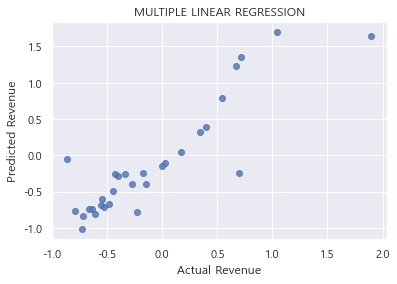

In [141]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [142]:
print(mlr.coef_)

[[ 0.94179007 -0.10627901  0.09528335]]


#### 라쏘 회귀 모델

In [143]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.8832067203747966
0.7060709472737059


C:\Users\admin\AppData\Local\Temp\ipykernel_14376\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+00, tolerance: 8.751e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [144]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [145]:
print(train_score)
print(test_score)

[0.8832051074796323, 0.8830443540717914, 0.8669592783602398, 0.17304928760208493, 0.0, 0.0]
[0.7068720982886927, 0.7139822687641882, 0.7709014279708721, 0.1651162208717949, -0.05375639629839113, -0.05375639629839113]


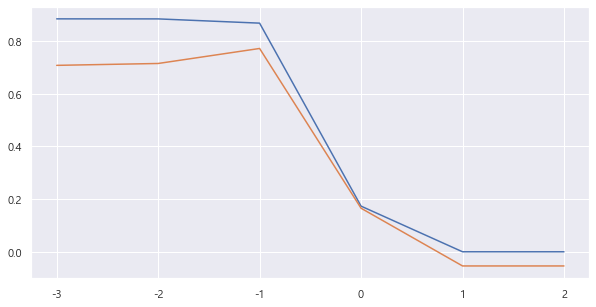

In [146]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [147]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[0. 0. 0.]
[0.04405346]


#### 릿지 회귀 모델

In [148]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.8830643127554886

In [149]:
ridge.score(X=x_test, y=y_test)

0.7142873287235599

In [150]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [151]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [152]:
print(train_score)
print(test_score)

[0.883206720227612, 0.8832067056607606, 0.8832052533809583, 0.8830643127554886, 0.8723226807369121, 0.6396862740998464]
[0.7060795487843283, 0.7061569267197786, 0.7069271855774957, 0.7142873287235599, 0.7612902585111564, 0.6415370909905413]


In [153]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[ 0.40836488 -0.01152115  0.13753611]]
[0.01033764]


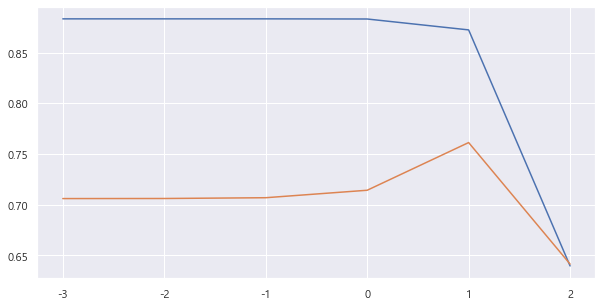

In [154]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## 정규화(MinMaxScaler) 후 재분석

### MinMaxScaler

In [155]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [156]:
df_dr.max()

일평균승하차(명)    5.782600e+04
상가 면적        1.767000e+03
남여비율         4.280000e+00
사업체수         4.870000e+02
거주X1인        2.609937e+08
일평균(원)       3.938885e+07
dtype: float64

In [157]:
df_dr.min()

일평균승하차(명)        346.00
상가 면적              0.00
남여비율               0.84
사업체수               0.00
거주X1인        2387510.00
일평균(원)         86682.00
dtype: float64

In [158]:
scaler = MinMaxScaler()
scaler.fit(df_dr)
df_scaled = scaler.transform(df_dr)

In [159]:
minmaxscaled_df = pd.DataFrame(df_scaled, columns=df_dr.columns)
minmaxscaled_df

,일평균승하차(명),상가 면적,남여비율,사업체수,거주X1인,일평균(원)
0,0.094868,0.006225,0.031977,0.100616,0.604211,0.046801
1,0.100226,0.005659,0.081395,0.117043,0.261594,0.062298
2,0.067937,0.000000,0.110465,0.223819,0.027936,0.049423
3,0.230950,0.020939,0.029070,0.073922,0.253695,0.117815
4,0.160056,0.009055,0.020349,0.234086,0.318515,0.076658
...,...,...,...,...,...,...
95,0.087891,0.005659,0.029070,0.071869,0.120564,0.026219
96,0.234864,0.042445,0.029070,0.014374,0.226420,0.150515
97,0.499896,0.093945,0.046512,0.073922,0.356151,0.277933
98,0.320946,0.033390,0.020349,0.164271,0.470134,0.222429


In [160]:
print(minmaxscaled_df.max())
print(minmaxscaled_df.min())

일평균승하차(명)    1.0
상가 면적        1.0
남여비율         1.0
사업체수         1.0
거주X1인        1.0
일평균(원)       1.0
dtype: float64
일평균승하차(명)    0.0
상가 면적        0.0
남여비율         0.0
사업체수         0.0
거주X1인        0.0
일평균(원)       0.0
dtype: float64


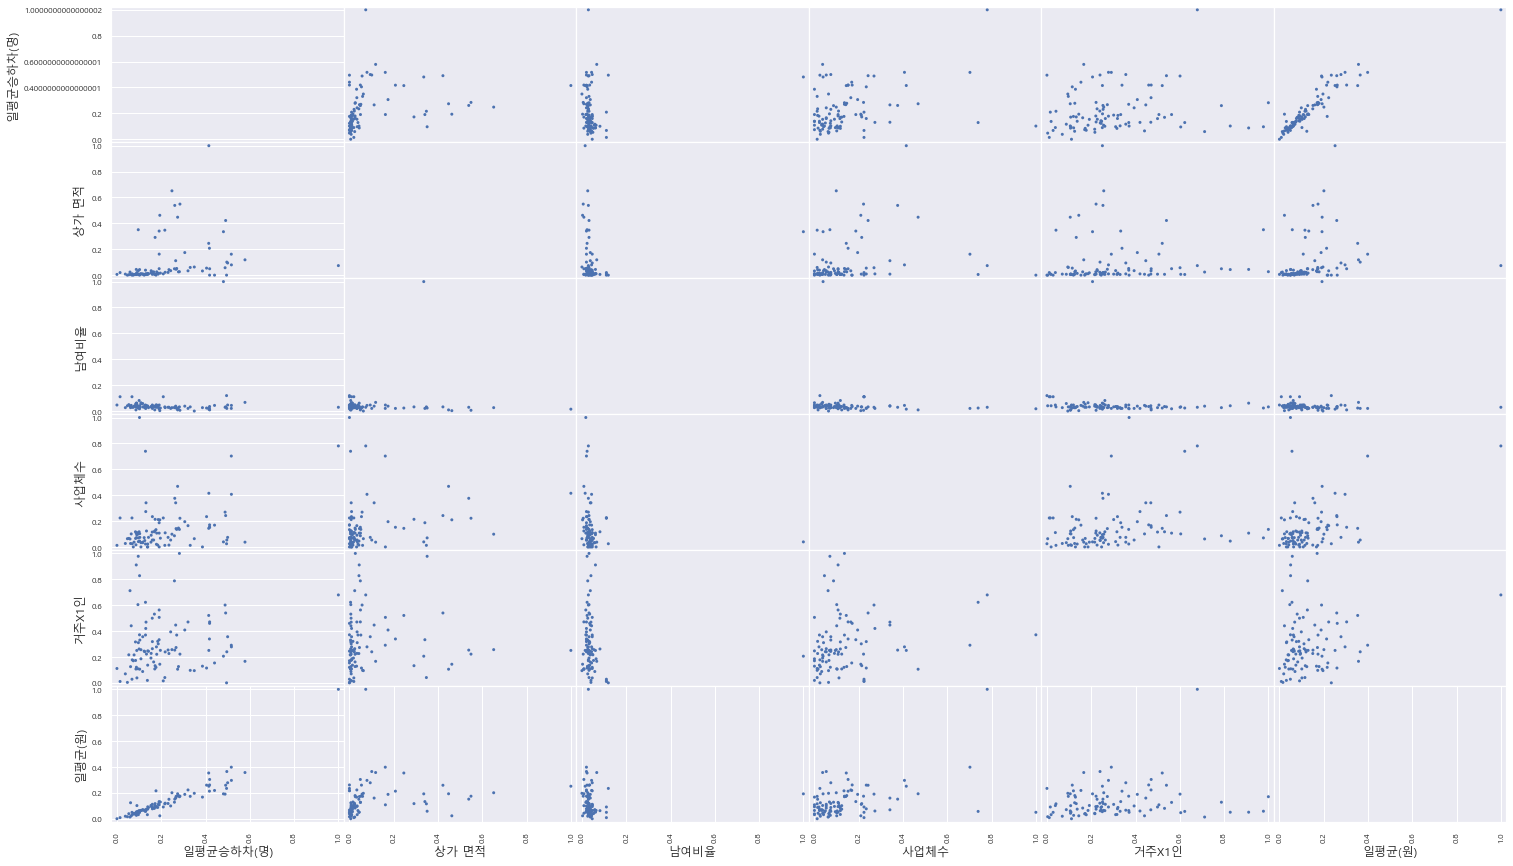

In [161]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(minmaxscaled_df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 상관계수 확인

In [162]:
df_minmaxscale_corr = minmaxscaled_df.corr()
df_minmaxscale_corr

,일평균승하차(명),상가 면적,남여비율,사업체수,거주X1인,일평균(원)
일평균승하차(명),1.000000,0.300601,0.135357,0.355560,0.142800,0.919696
상가 면적,0.300601,1.000000,0.088919,0.234948,0.034252,0.238792
남여비율,0.135357,0.088919,1.000000,-0.091802,-0.086876,0.019308
사업체수,0.355560,0.234948,-0.091802,1.000000,0.200405,0.420679
거주X1인,0.142800,0.034252,-0.086876,0.200405,1.000000,0.162338
일평균(원),0.919696,0.238792,0.019308,0.420679,0.162338,1.000000


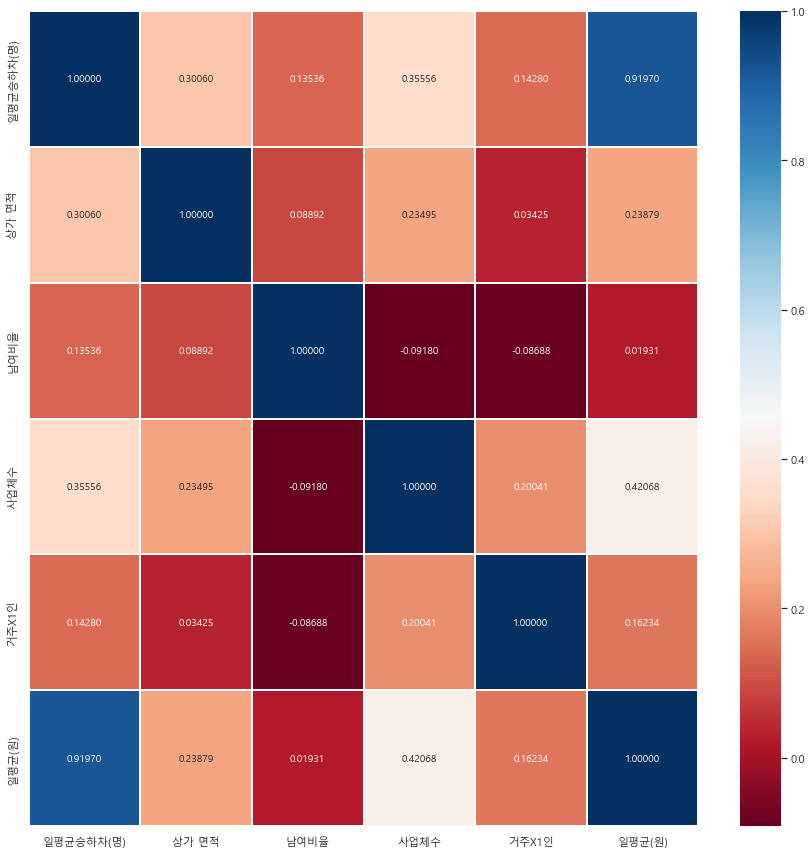

In [163]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_minmaxscale_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

### 다중회귀분석

#### 회귀모델 적합도

In [164]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [165]:
minmaxscale_x = minmaxscaled_df[["일평균승하차(명)","상가 면적","남여비율","거주X1인","사업체수"]]

In [166]:
minmaxscale_y = minmaxscaled_df[["일평균(원)"]]

In [167]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [168]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [169]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              177.8
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                    1.62e-36
Time:                        20:15:29   Log-Likelihood:                          109.68
No. Observations:                  70   AIC:                                     -209.4
Df Residuals:                      65   BIC:                                     -198.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.933
- Adj. R-squared : 0.927
- p-value : 일평균승하차(명), 남여비율 외는 의미 X

In [86]:
minmaxscale_x = minmaxscaled_df[["일평균승하차(명)","남여비율"]]

In [87]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [88]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [89]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              437.1
Date:                Thu, 24 Nov 2022   Prob (F-statistic):                    1.52e-39
Time:                        10:53:33   Log-Likelihood:                          107.68
No. Observations:                  70   AIC:                                     -211.4
Df Residuals:                      68   BIC:                                     -206.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 선형 회귀

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [71]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8841504646673672

In [72]:
multi_model.score(x_test, y_test)

0.7048394421819533

#### 예측

In [73]:
my_predict = mlr.predict(x_test)
my_predict

array([[0.03035609],
       [0.17636833],
       [0.03641679],
       [0.05486509],
       [0.00389705],
       [0.11114253],
       [0.0822478 ],
       [0.28037879],
       [0.02461576],
       [0.04115187],
       [0.07111321],
       [0.09548985],
       [0.0361079 ],
       [0.33957317],
       [0.11559538],
       [0.0996416 ],
       [0.09914148],
       [0.22293633],
       [0.02971868],
       [0.03995796],
       [0.29465974],
       [0.04257211],
       [0.10051587],
       [0.16869718],
       [0.33021243],
       [0.11792853],
       [0.10182654],
       [0.13869577],
       [0.04396799],
       [0.08379495]])

#### 시각화

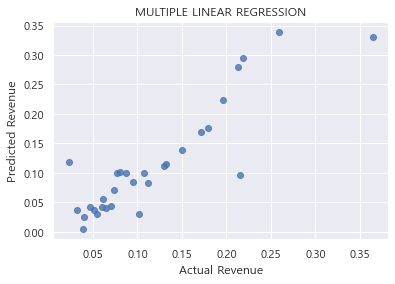

In [74]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [75]:
print(mlr.coef_)

[[ 0.7363031  -0.01189361  0.01505565 -0.12721072  0.00149957  0.06733899]]


#### 라쏘 회귀 모델

In [76]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.8841504646673672
0.7048394421819544


C:\Users\admin\AppData\Local\Temp\ipykernel_14376\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.773e-02, tolerance: 1.342e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [77]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [78]:
print(train_score)
print(test_score)

[0.8771239483373985, 0.6802001248948124, 0.0, 0.0, 0.0, 0.0]
[0.7382911917793645, 0.7266360273681028, -0.05375639629839157, -0.05375639629839157, -0.05375639629839157, -0.05375639629839157]


In [79]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[ 0.  0.  0.  0. -0.  0.]
[0.13509576]


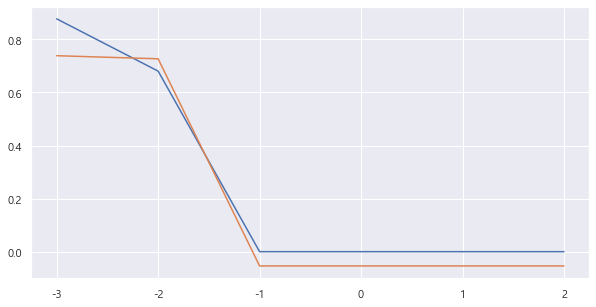

In [80]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

#### 릿지 회귀 모델

In [81]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.7924930916423119

In [82]:
ridge.score(X=x_test, y=y_test)

0.7015772854704769

In [83]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [84]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [85]:
print(train_score)
print(test_score)

[0.8841501855431989, 0.8841229698641611, 0.881765509509756, 0.7924930916423119, 0.3378697017248312, 0.050403624692145654]
[0.7050856828807637, 0.707243250457281, 0.7237742623282801, 0.7015772854704769, 0.2759758286832864, -0.0041528353554893815]


In [86]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[ 1.49210734e-02  3.90082025e-03  5.65283609e-03  2.74511546e-04
  -3.19083946e-05  7.86798505e-03]]
[0.12767813]


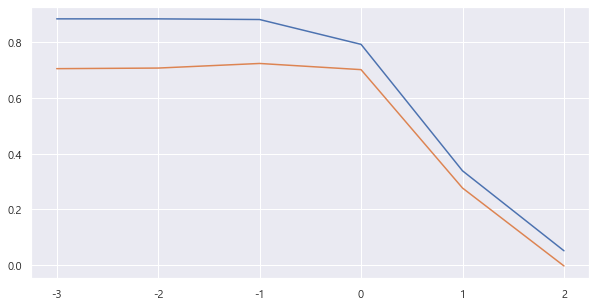

In [87]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

train_score와 test_score값이 떨어지기 전 + 일치할 때인, alpha가 1일떄 가장 최적화됐다.

### Min-max scaler로 정규화한 데이터를 가지고 Ridge모델을 사용하는 것이 가장 좋은 결과가 나옴